In [2]:
from pylab import *
import scipy
import ruptures as rpt
%matplotlib inline

In [4]:
import mat2python
data,trial,classes=mat2python.mat2python(repetition_number=0)
#sampling rate 10 Hz

 I am loading the 0 repetition of the protocol


# Plotting the signal

Select the oxy data in the region of interest

In [ ]:
oxy=data[:,0:52]
roi1=list(array([46,47,48])-1)#python indexes starts from 0
roi2=list(array([18,28,29])-1)
roi3=list(array([13, 23, 24])-1)

In [ ]:
fig,axes=subplots(3,1,sharex=True)
t=arange(0,len(oxy))*0.1#it converts frame in time

#------------ROI1------------------
axes[0].plot(t,oxy[:,roi1],lw=0.8)
xmin,xmax,ymin,ymax=axes[0].axis()
axes[0].vlines(trial[::2]*0.1,ymin,ymax,linestyles="--",color="g")#start mental operation
axes[0].vlines(trial[1::2]*0.1,ymin,ymax,linestyles="--",color="r")#start pause
axes[0].set_title("ROI1")

# Shrink current axis by 20%
box = axes[0].get_position()
axes[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
axes[0].legend(array(roi1)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
axes[0].set_ylabel("$[Oxy]$",labelpad=10,fontsize=14)

#------------ROI2------------------
axes[1].plot(t,oxy[:,roi2],lw=0.8,label="ROI2")
xmin,xmax,ymin,ymax=axes[1].axis()
axes[1].vlines(trial[::2]*0.1,ymin,ymax,linestyles="--",color="g")#start mental operation
axes[1].vlines(trial[1::2]*0.1,ymin,ymax,linestyles="--",color="r")#start pause

# Shrink current axis by 20%
box = axes[1].get_position()
axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height*0.8])

# Put a legend to the right of the current axis
axes[1].legend(array(roi2)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].set_ylabel("$[Oxy]$",fontsize=14)
axes[1].set_title("ROI2")

#------------ROI3------------------
axes[2].plot(t,oxy[:,roi3],lw=0.8,label="ROI3")
xmin,xmax,ymin,ymax=axes[2].axis()
axes[2].vlines(trial[::2]*0.1,ymin,ymax,linestyles="--",color="g")#start mental operation
axes[2].vlines(trial[1::2]*0.1,ymin,ymax,linestyles="--",color="r")#start pause

# Shrink current axis by 20%
box = axes[2].get_position()
axes[2].set_position([box.x0, box.y0, box.width * 0.8, box.height*0.8])

# Put a legend to the right of the current axis
axes[2].legend(array(roi3)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
axes[2].set_title("ROI3")
xlabel("time (s)")
axes[2].set_ylabel("$[Oxy]$",fontsize=14)
#savefig("./figure/time-series.pdf")


# Single changepoint detection

Find when the protocol begins. We consider the time up to the first rest ( the first red line).

In [4]:
signal=oxy[:trial[1],roi1+roi2+roi3]
t_sign=arange(0,len(signal))*0.1

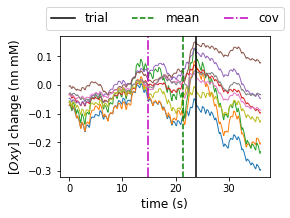

In [5]:
figure(figsize=(4,3))
signal=oxy[:trial[1],roi1+roi2+roi3]
t_sign=arange(0,len(signal))*0.1
plot(t_sign,signal,lw=1)
axvline(trial[0]*0.1,label="trial",color="k")
#axvline(l2_result[0]*0.1,color="r")
axvline(213*0.1,color="g",linestyle="--",label="mean")#cusum
axvline(148*0.1,color="m",linestyle="-.",label="cov")#cusum

xlabel("time (s)",fontsize=12)
ylabel("$[Oxy]$ change (nn mM)",fontsize=12)
tight_layout()
#legend(fontsize=12,ncol=3,numpoints=1) 
box = gca().get_position()
gca().set_position([box.x0, box.y0, box.width , box.height*0.9])
legend(fontsize=12,loc="lower center",ncol=3,numpoints=1, bbox_to_anchor=(0.5, 1))
#text(21.7,-0.3,"21.3 s",color="g")
#text(15.2,-0.3,"14.8 s",color="m")
#text(24.2,-0.3,"23.8 s",color="k")
#savefig("./figure/single_changepoint.pdf")

In [9]:
#l2 model

algo = rpt.Dynp(model="l2").fit(signal)
#algo = rpt.Dynp(model="l2").fit(oxy[:trial[1],:])
l2_result = algo.predict(n_bkps=1)
#rpt.display(signal[:,1],trial[:2],l2_result)
algo = rpt.Dynp(model="rbf").fit(signal)
rbf_result = algo.predict(n_bkps=1)
print(l2_result[0],rbf_result[0])


280 280


235.0


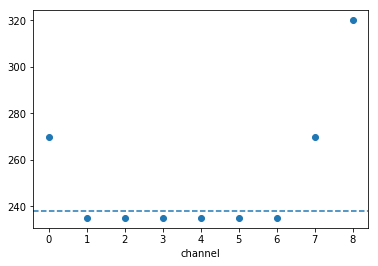

In [49]:
a=[]
for i in arange(0,9):#explore all channel one by one
    algo = rpt.Dynp(model="ar", params={"order": 1}).fit(signal[:,i])
    result = algo.predict(n_bkps=1)
    a+=[result[0]]
plot(a,"o")
axhline(238,ls="--")
xlabel("channel")
a
print(median(a))

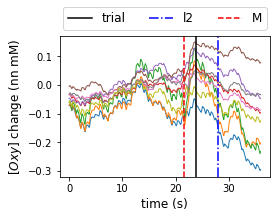

In [8]:
figure(figsize=(4,3))
signal=oxy[:trial[1],roi1+roi2+roi3]
t_sign=arange(0,len(signal))*0.1
plot(t_sign,signal,lw=1)
axvline(trial[0]*0.1,label="trial",color="k")
algo = rpt.Dynp(model="mahalanobis").fit(signal) #equivalent to rpt.Dynp(model="mahalanobis", params={"metric": inv(M)})
M_result = algo.predict(n_bkps=1)
#axvline(rbf_result[0]*0.1,color="g",linestyle="--",label="rbf")
axvline(l2_result[0]*0.1,color="b",linestyle="-.",label="l2")
#axvline(213*0.1,color="r",linestyle="--",label="mean")#cusum
axvline(M_result[0]*0.1,color="r",linestyle="--",label="M")

xlabel("time (s)",fontsize=12)
ylabel("$[Oxy]$ change (nn mM)",fontsize=12)
tight_layout()

box = gca().get_position()
gca().set_position([box.x0, box.y0, box.width , box.height*0.9])
legend(fontsize=12,loc="lower center",ncol=3,numpoints=1, bbox_to_anchor=(0.5, 1))
#savefig("./figure/cost function.pdf")

In [124]:
print(trial*0.1)
print(diff(trial)*.1)

[  23.8   36.    63.9   76.   103.9  116.   143.9  156.   183.9  196.
  223.9  236. ]
[ 12.2  27.9  12.1  27.9  12.1  27.9  12.1  27.9  12.1  27.9  12.1]


In [56]:
#M=cov(signal,rowvar=False)
algo = rpt.Dynp(model="mahalanobis").fit(signal) #equivalent to rpt.Dynp(model="mahalanobis", params={"metric": inv(M)})
M_result = algo.predict(n_bkps=1)
print(M_result[0])

215


In [147]:
inv(M)

array([[ 17562.46240235,   -734.72881845,  -7645.33412642, -12278.75269179,
         12574.81297476,   6875.95049689,   1390.62419908,  -6161.91009388,
        -14577.71961103],
       [  -734.72881845,   5573.79794089,  -3809.69280089,  -3611.96679727,
          4950.79153542,  -3231.08023438,     97.22361101,   1533.54311766,
         -2878.58832967],
       [ -7645.33412642,  -3809.69280089,   8624.39460936,   6473.06829618,
         -9081.67602779,   -948.54866358,  -4222.18983794,   3047.6160131 ,
          7230.28703202],
       [-12278.75269179,  -3611.96679727,   6473.06829618,  23009.14787608,
        -17996.21024939,  -3087.83078361,   -654.75023599,   3008.63144882,
         12436.95724549],
       [ 12574.81297476,   4950.79153542,  -9081.67602779, -17996.21024939,
         20743.4884131 ,    845.68252942,    336.72658616,  -5777.39069649,
        -15006.84098309],
       [  6875.95049689,  -3231.08023438,   -948.54866358,  -3087.83078361,
           845.68252942,   6090.39

In [13]:
trial[0]

238

In [15]:
rpt.display?

'xmin,xmax,ymin,ymax=gca().axis()\nvlines(trial[::2],ymin,ymax,linestyles="--",color="g")#start mental operation\nvlines(trial[1::2],ymin,ymax,linestyles="--",color="r")#start pause\nxlim(0,360)'

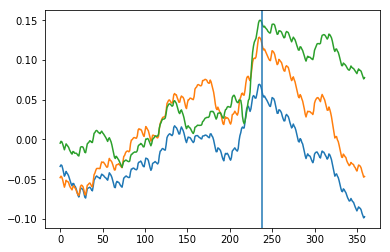

In [79]:
algo = rpt.Dynp(model="normal")


In [69]:
roi1+roi2+roi3 -1

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [67]:
shape(oxy[:,51])

(2671,)